In [ ]:
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io, color, segmentation
from skimage.future import graph
from scipy import ndimage as ndi
from rembg import remove

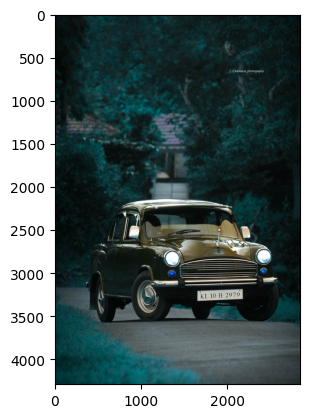

In [ ]:
img = cv2.imread('image.jpg')
plt.imshow(img)

In [ ]:
# size : 1.4 MB
# resolution : 72dpi
# dimensions : 2848 x 4288

In [ ]:
img.size

36636672

In [ ]:
file_size_bytes = os.path.getsize('image.jpg')
print("Size of Image:", file_size_bytes/2**20, "MB")

Size of Image: 1.301039695739746 MB


In [ ]:
height, width = img.shape[:2]
print("Dimensions of the image:", height, "x", width)

Dimensions of the image: 4288 x 2848


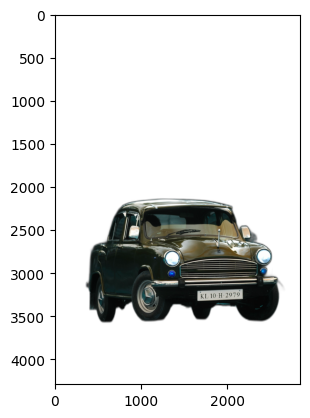

In [ ]:
foreground = remove(img)
plt.imshow(foreground)

In [ ]:
img.shape

(4288, 2848, 3)

In [ ]:
foreground.shape

(4288, 2848, 4)

In [ ]:
foreground

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

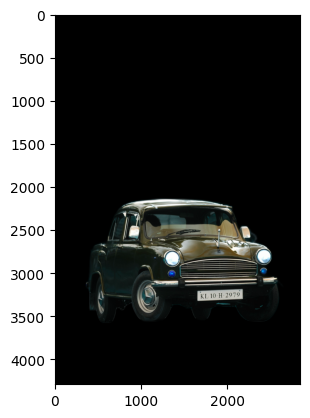

In [ ]:
foreground_image = foreground[:, :, :3]
plt.imshow(foreground_image)

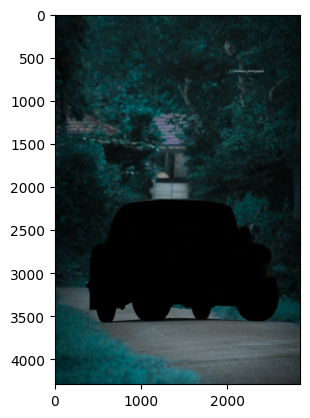

In [ ]:
background_image = img - foreground_image
plt.imshow(background_image)

In [ ]:
def rle_encode(image):
    """
    Perform Run-Length Encoding (RLE) compression on an image.

    Parameters:

    image (numpy.ndarray): Input image as a NumPy array.

    Returns:
    list: List of tuples representing (value, run_length) pairs.
    """
    flattened_image = image.flatten()
    rle_data = []
    current_value = flattened_image[:3]  # Initialize with the first pixel RGB values
    run_length = 1

    for i in range(3, len(flattened_image), 3):
        pixel = flattened_image[i:i+3]
        if np.array_equal(pixel, current_value):
            run_length += 1
        else:
            rle_data.append((current_value, run_length))
            current_value = pixel
            run_length = 1

    # Add the last run
    rle_data.append((current_value, run_length))

    return rle_data

def rle_decode(rle_data, image_shape):
    """
    Perform Run-Length Decoding (RLE) to reconstruct an image.

    Parameters:
    rle_data (list): List of tuples representing (value, run_length) pairs.
    image_shape (tuple): Shape of the original image.

    Returns:
    numpy.ndarray: Reconstructed image as a NumPy array.
    """
    reconstructed_image = np.zeros(image_shape, dtype=np.uint8)
    current_index = 0

    for value, run_length in rle_data:
        for _ in range(run_length):
            reconstructed_image.flat[current_index:current_index + 3] = value
            current_index += 3

    return reconstructed_image.reshape(image_shape)

# Assuming 'image' is an RGB image represented as a NumPy array
# Compressing the image
compressed_data = rle_encode(foreground_image)

In [ ]:
foreground_image.size

36636672

In [ ]:
len(compressed_data)

1818147

In [ ]:
comp_fore = compressed_data.copy()

In [ ]:
len(comp_fore)

1818147

In [ ]:
for i in range(len(comp_fore)):
  k,l = comp_fore[i]
  comp_fore[i] = np.append(comp_fore[i][0], l)

In [ ]:
type(comp_fore)

list

In [ ]:
comp_fore = np.array(comp_fore)

In [ ]:
comp_fore.shape

(1818147, 4)

In [ ]:
plt.imsave("compressed_foreground.png", comp_fore)

In [ ]:
cv2.imwrite('foreground.jpg', foreground_image)

True

In [ ]:
file_size_bytes = os.path.getsize('foreground.jpg')
print("Size of Foreground Image:", file_size_bytes/2**20, "MB")

Size of Foreground Image: 0.7046165466308594 MB


In [ ]:
file_size_bytes = os.path.getsize('compressed_foreground.png')
print("Size of Compressed Foreground Image:", file_size_bytes/2**20, "MB")

Size of Compressed Foreground Image: 0.07165145874023438 MB


In [ ]:
compressed_foreground = plt.imread('compressed_foreground.png')

In [ ]:
read_compress_fore = []
for i in range(len(compressed_foreground)):
  k,l = compressed_foreground[i][0][:3], compressed_foreground[i][0][3]
  read_compress_fore.append((k,l))

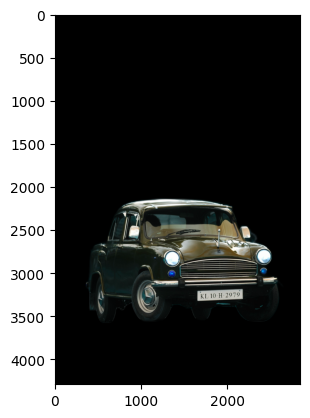

In [ ]:
# Decompressing the image
reconstructed_foreground = rle_decode(read_compress_fore, foreground_image.shape)
plt.imshow(reconstructed_foreground)

In [ ]:
cv2.imwrite('reconstructed_foreground.jpg', reconstructed_foreground)

True

In [ ]:
file_size_bytes = os.path.getsize('reconstructed_foreground.jpg')
print("Size of Reconstructed Foreground Image:", file_size_bytes/2**20, "MB")

Size of Reconstructed Foreground Image: 0.7046165466308594 MB


In [ ]:
!pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 5.9 MB/s eta 0:00:00


In [ ]:
import math
from bitarray import bitarray

class LZ77Compressor:
	"""
	A simplified implementation of the LZ77 Compression Algorithm
	"""
	MAX_WINDOW_SIZE = 400

	def __init__(self, window_size=20):
		self.window_size = min(window_size, self.MAX_WINDOW_SIZE)
		self.lookahead_buffer_size = 15 # length of match is at most 4 bits

	def compress(self, input_file_path, output_file_path=None, verbose=False):
		"""
		Given the path of an input file, its content is compressed by applying a simple
		LZ77 compression algorithm.

		The compressed format is:
		0 bit followed by 8 bits (1 byte character) when there are no previous matches
			within window
		1 bit followed by 12 bits pointer (distance to the start of the match from the
			current position) and 4 bits (length of the match)

		If a path to the output file is provided, the compressed data is written into
		a binary file. Otherwise, it is returned as a bitarray

		if verbose is enabled, the compression description is printed to standard output
		"""
		data = None
		i = 0
		output_buffer = bitarray(endian='big')

		# read the input file
		try:
			with open(input_file_path, 'rb') as input_file:
				data = input_file.read()
		except IOError:
			print('Could not open input file ...')
			raise

		while i < len(data):
			#print(i)

			match = self.findLongestMatch(data, i)

			if match:
				# Add 1 bit flag, followed by 12 bit for distance, and 4 bit for the length
				# of the match
				(bestMatchDistance, bestMatchLength) = match

				output_buffer.append(True)
				output_buffer.frombytes(bytes([bestMatchDistance >> 4]))
				output_buffer.frombytes(bytes([((bestMatchDistance & 0xf) << 4) | bestMatchLength]))

				if verbose:
                                        print("<1, %i, %i>" % (bestMatchDistance, bestMatchLength), end='')

				i += bestMatchLength

			else:
				# No useful match was found. Add 0 bit flag, followed by 8 bit for the character
				output_buffer.append(False)
				output_buffer.frombytes(bytes([data[i]]))

				if verbose:
					print("<0, %s>" % data[i], end='')

				i += 1

		# fill the buffer with zeros if the number of bits is not a multiple of 8
		output_buffer.fill()

		# write the compressed data into a binary file if a path is provided
		if output_file_path:
			try:
				with open(output_file_path, 'wb') as output_file:
					output_file.write(output_buffer.tobytes())
					print("File was compressed successfully and saved to output path ...")
					return None
			except IOError:
				print('Could not write to output file path. Please check if the path is correct ...')
				raise

		# an output file path was not provided, return the compressed data
		return output_buffer


	def decompress(self, input_file_path, output_file_path=None):
		"""
		Given a string of the compressed file path, the data is decompressed back to its
		original form, and written into the output file path if provided. If no output
		file path is provided, the decompressed data is returned as a string
		"""
		data = bitarray(endian='big')
		output_buffer = []

		# read the input file
		try:
			with open(input_file_path, 'rb') as input_file:
				data.fromfile(input_file)
		except IOError:
			print('Could not open input file ...')
			raise

		while len(data) >= 9:

			flag = data.pop(0)

			if not flag:
				byte = data[0:8].tobytes()

				output_buffer.append(byte)
				del data[0:8]
			else:
				byte1 = ord(data[0:8].tobytes())
				byte2 = ord(data[8:16].tobytes())

				del data[0:16]
				distance = (byte1 << 4) | (byte2 >> 4)
				length = (byte2 & 0xf)

				for i in range(length):
					output_buffer.append(output_buffer[-distance])
		out_data =  b''.join(output_buffer)

		if output_file_path:
			try:
				with open(output_file_path, 'wb') as output_file:
					output_file.write(out_data)
					print('File was decompressed successfully and saved to output path ...')
					return None
			except IOError:
				print('Could not write to output file path. Please check if the path is correct ...')
				raise
		return out_data


	def findLongestMatch(self, data, current_position):
		"""
		Finds the longest match to a substring starting at the current_position
		in the lookahead buffer from the history window
		"""
		end_of_buffer = min(current_position + self.lookahead_buffer_size, len(data) + 1)

		best_match_distance = -1
		best_match_length = -1

		# Optimization: Only consider substrings of length 2 and greater, and just
		# output any substring of length 1 (8 bits uncompressed is better than 13 bits
		# for the flag, distance, and length)
		for j in range(current_position + 2, end_of_buffer):

			start_index = max(0, current_position - self.window_size)
			substring = data[current_position:j]

			for i in range(start_index, current_position):

				repetitions = len(substring) // (current_position - i)

				last = len(substring) % (current_position - i)

				matched_string = data[i:current_position] * repetitions + data[i:i+last]

				if matched_string == substring and len(substring) > best_match_length:
					best_match_distance = current_position - i
					best_match_length = len(substring)

		if best_match_distance > 0 and best_match_length > 0:
			return (best_match_distance, best_match_length)
		return None

In [ ]:
cv2.imwrite('background.jpg', background_image)

True

In [ ]:
compressor = LZ77Compressor(window_size=20)
input_file_path = 'background.jpg'
output_file_path = 'compressed_background.jpg'

# compress the input file and write it as binary into the output file
compressor.compress(input_file_path, output_file_path)

File was compressed successfully and saved to output path ...


In [ ]:
file_size_bytes = os.path.getsize('background.jpg')
print("Size of Background Image:", file_size_bytes/2**20, "MB")

Size of Background Image: 1.4862680435180664 MB


In [ ]:
file_size_bytes = os.path.getsize('compressed_background.jpg')
print("Size of Compressed Background Image:", file_size_bytes/2**20, "MB")

Size of Compressed Background Image: 0.07014076232910149 MB


In [ ]:
input_file_path = 'compressed_background.jpg'
output_file_path = 'reconstructed_background.jpg'

# decompress the input file and write it as binary into the output file
compressor.decompress(input_file_path, output_file_path)

File was decompressed successfully and saved to output path ...


In [1]:
file_size_bytes = os.path.getsize('reconstructed_background.jpg')
print("Size of Image:", file_size_bytes/2**20, "MB")

Size of Image: 1.472151466595254 MB


In [ ]:
reconstructed_background = cv2.imread('reconstructed_background.jpg')
reconstructed_foreground = cv2.imread('reconstructed_foreground.jpg')

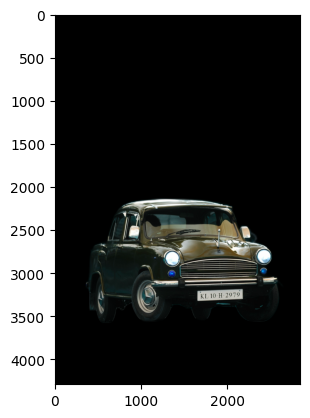

In [ ]:
plt.imshow(reconstructed_foreground)

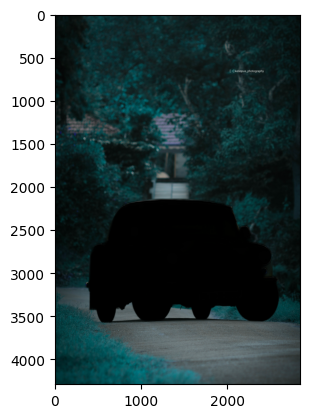

In [ ]:
plt.imshow(reconstructed_background)

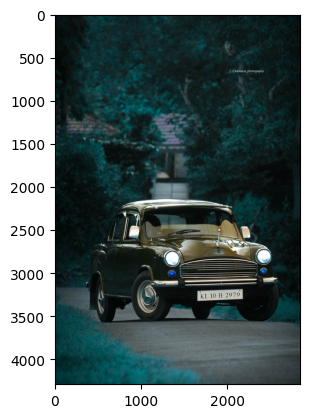

In [ ]:
reconstructed_image = foreground_image + background_image
plt.imshow(reconstructed_image)

In [ ]:
cv2.imwrite('reconstructed_image.jpg', reconstructed_image)

True

In [ ]:
file_size_bytes = os.path.getsize('image.jpg')
print("Size of Image:", file_size_bytes/2**20, "MB")

Size of Image: 1.301039695739746 MB


In [ ]:
file_size_bytes = os.path.getsize('reconstructed_image.jpg')
print("Size of Image:", file_size_bytes/2**20, "MB")

Size of Image: 1.2936304473876952 MB
